In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# 设定目录路径
dir_path = "H_Env_Pen_Emb_Env9_Test1"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

In [3]:
file_names

['0_reward_logs.npy',
 '1_reward_logs.npy',
 '2_reward_logs.npy',
 '3_reward_logs.npy',
 '4_reward_logs.npy']

In [4]:
# 设定目录路径
# dir_path = "H_Env_Base_Pen"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

# 按文件名中的数字排序
file_names.sort(key=lambda x: int(x.split('_')[0]))

# 读取每个文件中的数据
rewards = []
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    reward_data = np.load(file_path)
    rewards.append(reward_data)



In [5]:
len(rewards)

5

In [6]:
rewards[0].shape

(30, 9)

In [8]:
save_dir = "Res_H_Env_Pen"
file_name = f"FMRL_Emb_EnsNumEachClient=3.npy"
np.save(os.path.join(save_dir, file_name), rewards)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_experiments(rewards, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)

    # 打印每个环境的最终奖励值和方差
    print("Final rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")

    # 打印所有环境的最终奖励值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")

    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)  # 添加网格线
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)  # 添加网格线
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)  # 添加网格线
    plt.show()


Final rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -189.00, Final Std Dev: 70.70
Environment 2 - Final Mean Reward: -185.05, Final Std Dev: 81.83
Environment 3 - Final Mean Reward: -199.02, Final Std Dev: 80.63
Environment 4 - Final Mean Reward: -298.73, Final Std Dev: 192.03
Environment 5 - Final Mean Reward: -331.22, Final Std Dev: 176.89
Environment 6 - Final Mean Reward: -321.72, Final Std Dev: 189.20
Environment 7 - Final Mean Reward: -565.69, Final Std Dev: 185.75
Environment 8 - Final Mean Reward: -560.15, Final Std Dev: 206.97
Environment 9 - Final Mean Reward: -584.74, Final Std Dev: 195.45
All Environments - Final Average Mean Reward: -359.48, Final Std Dev: 158.00


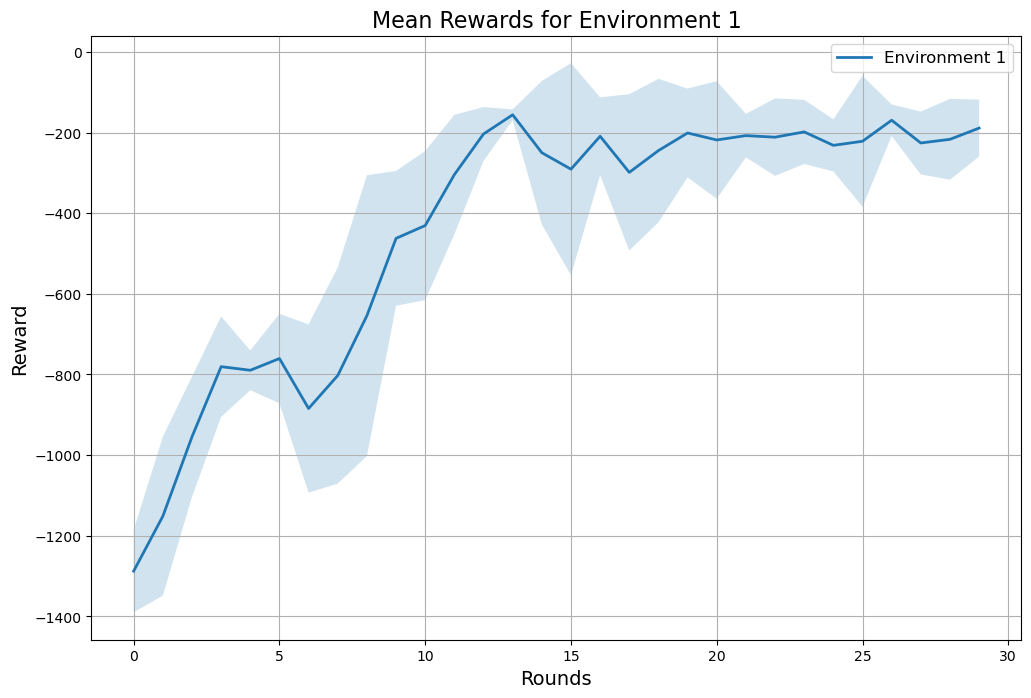

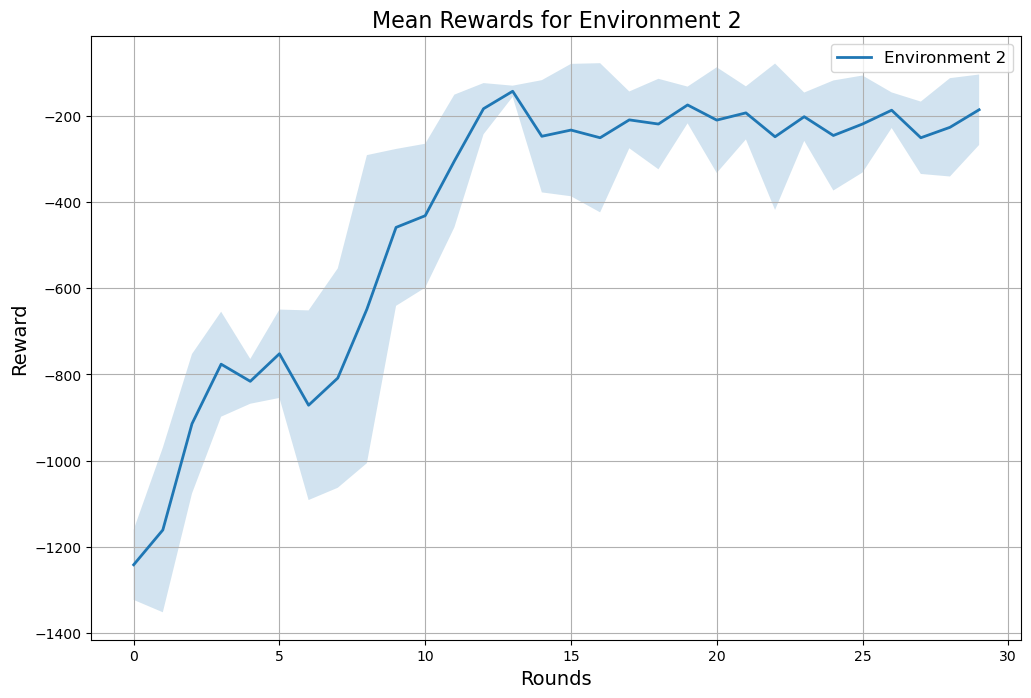

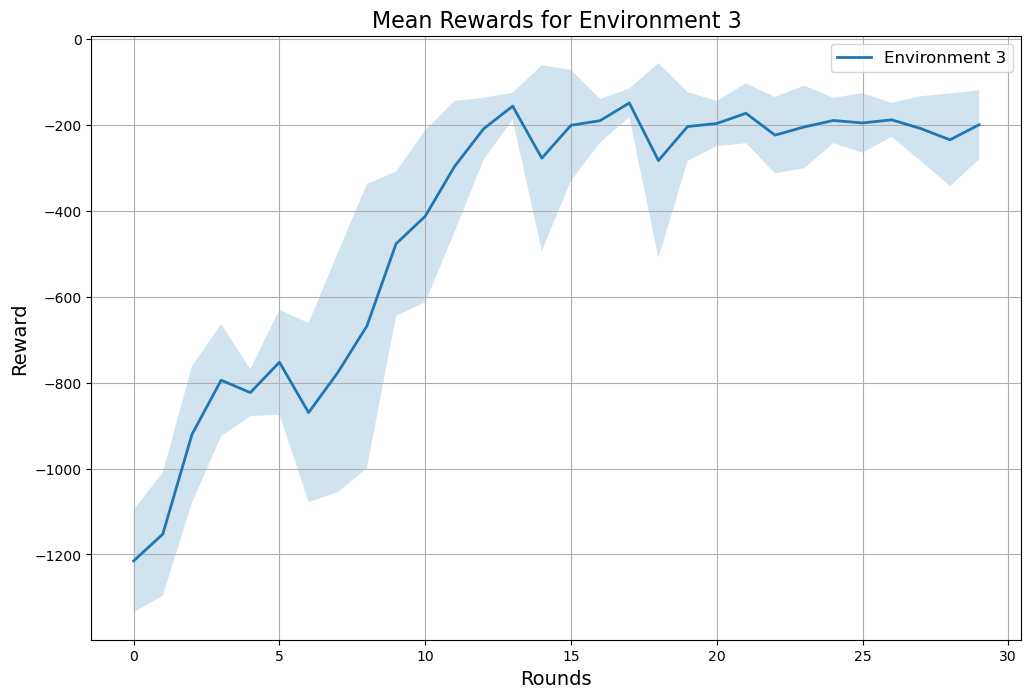

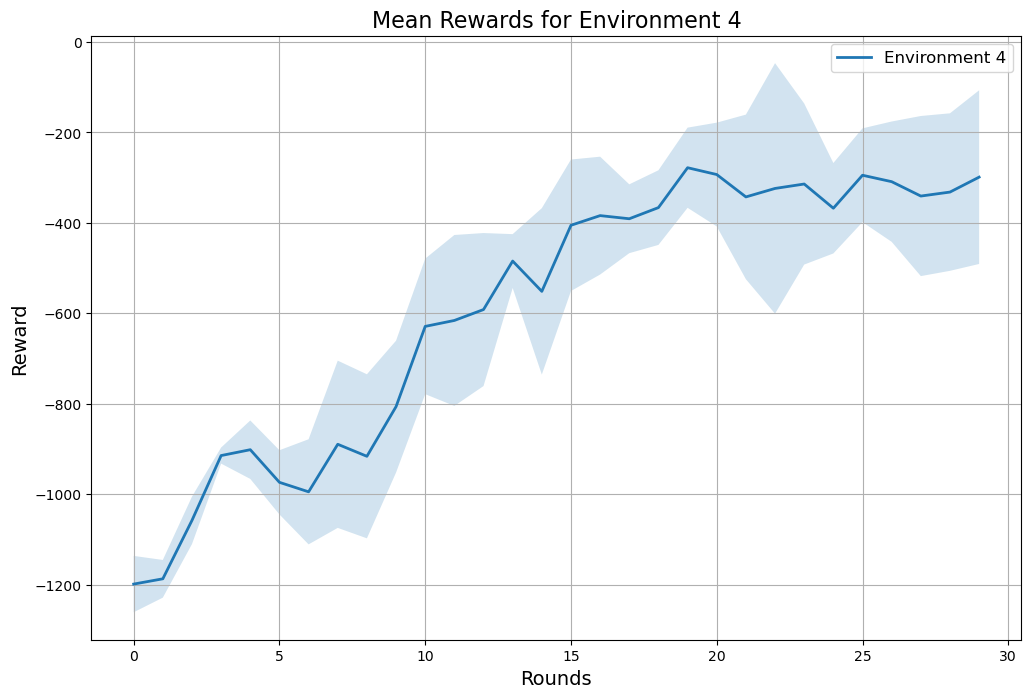

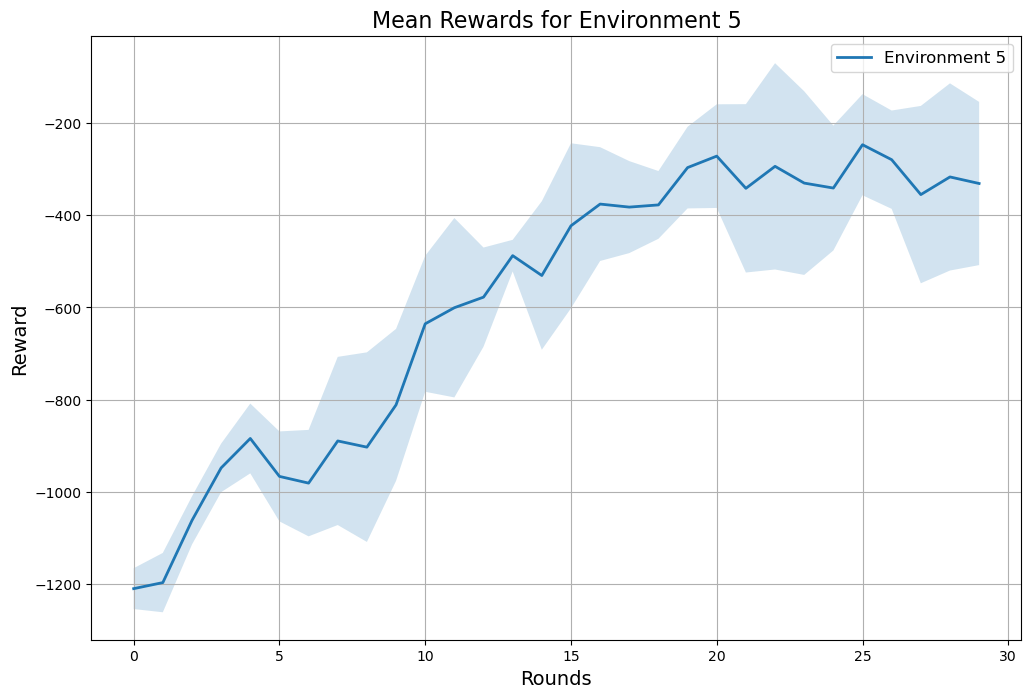

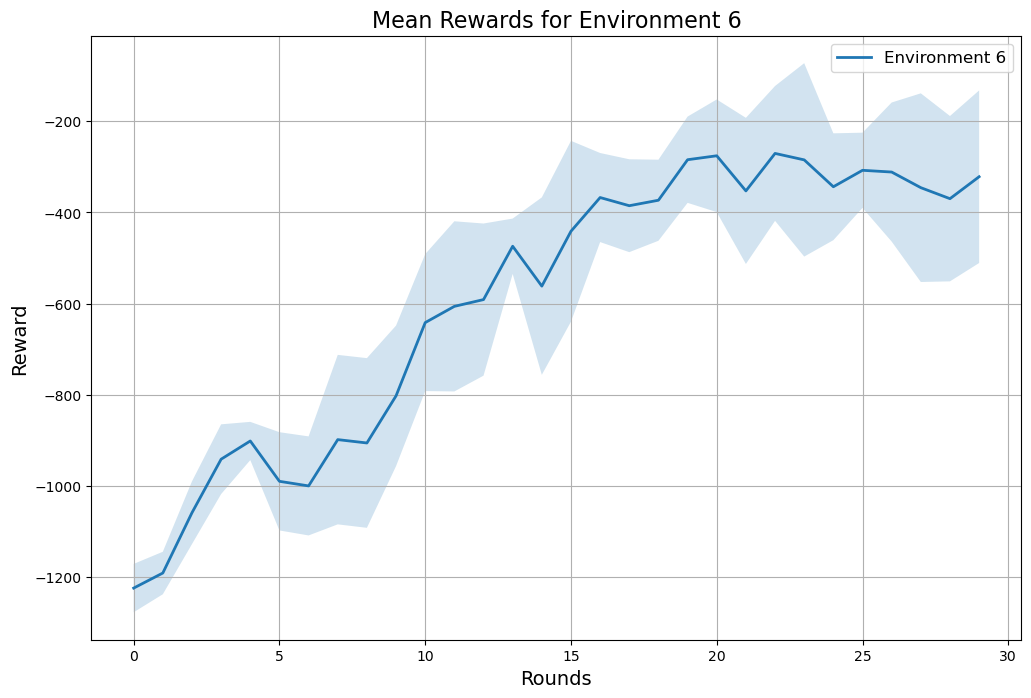

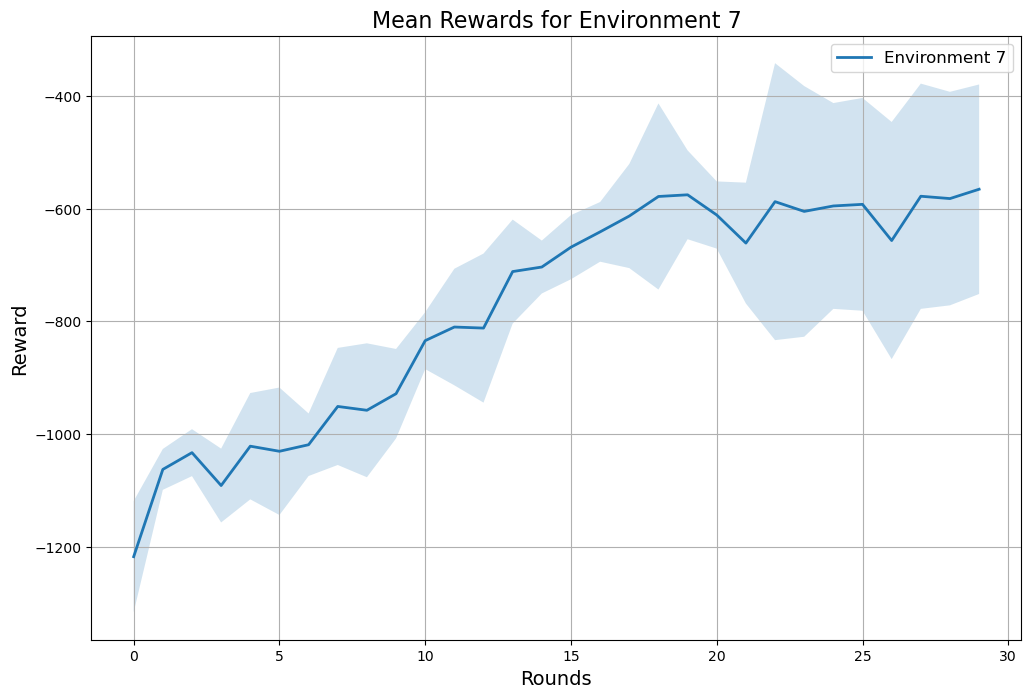

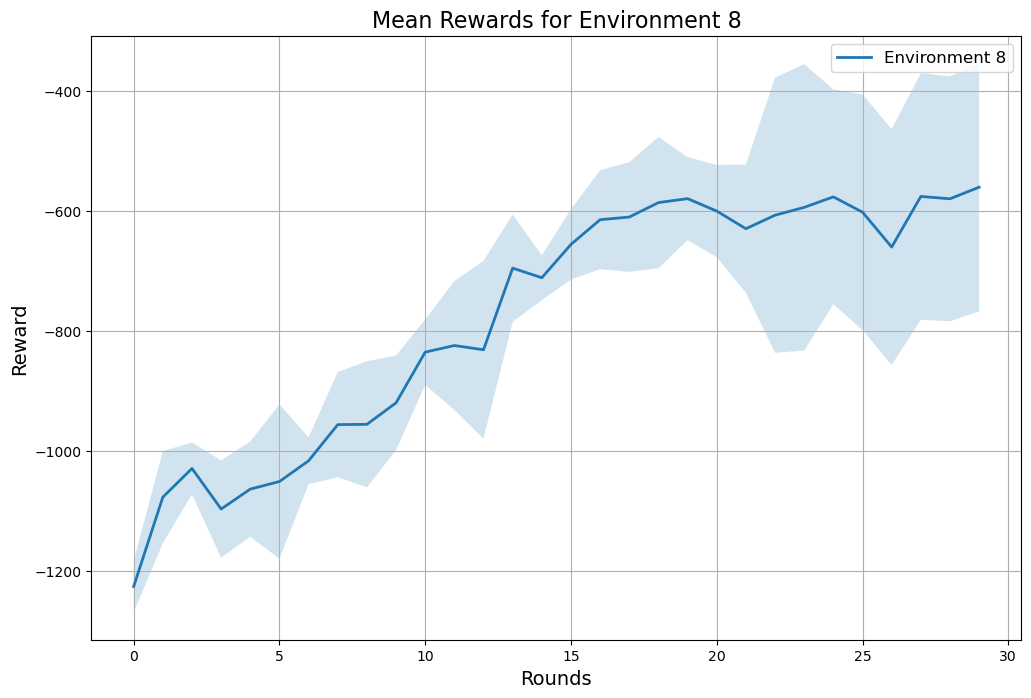

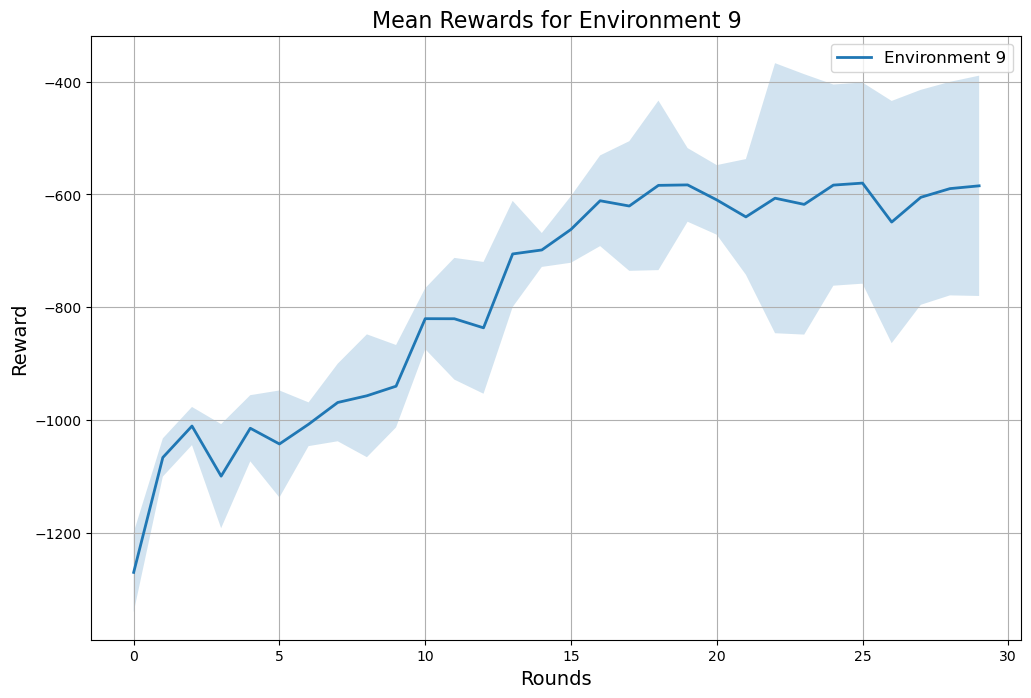

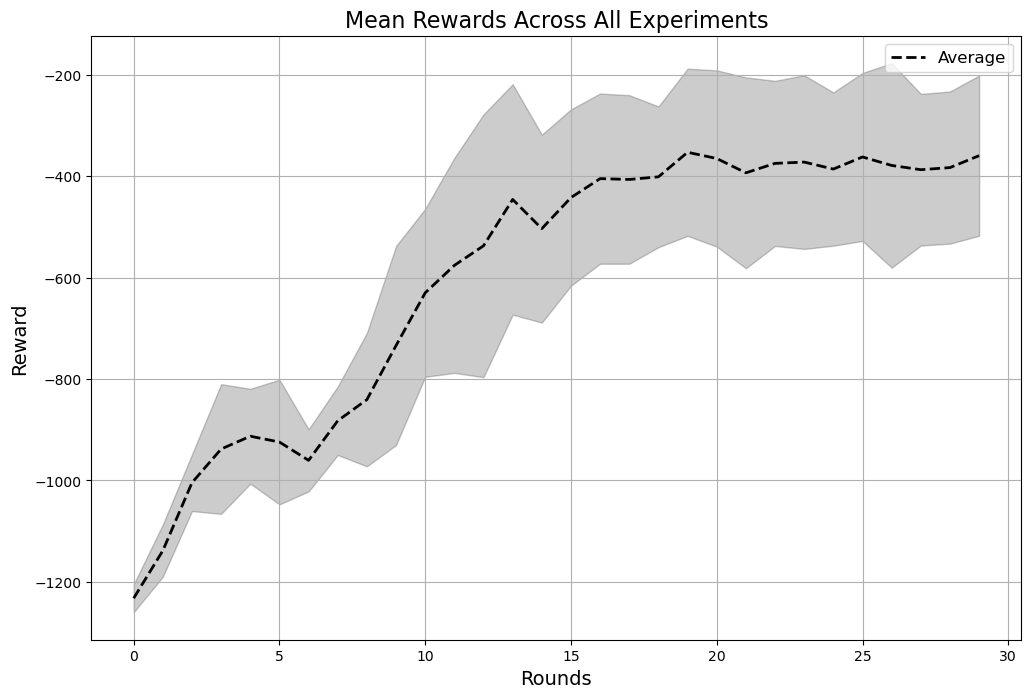

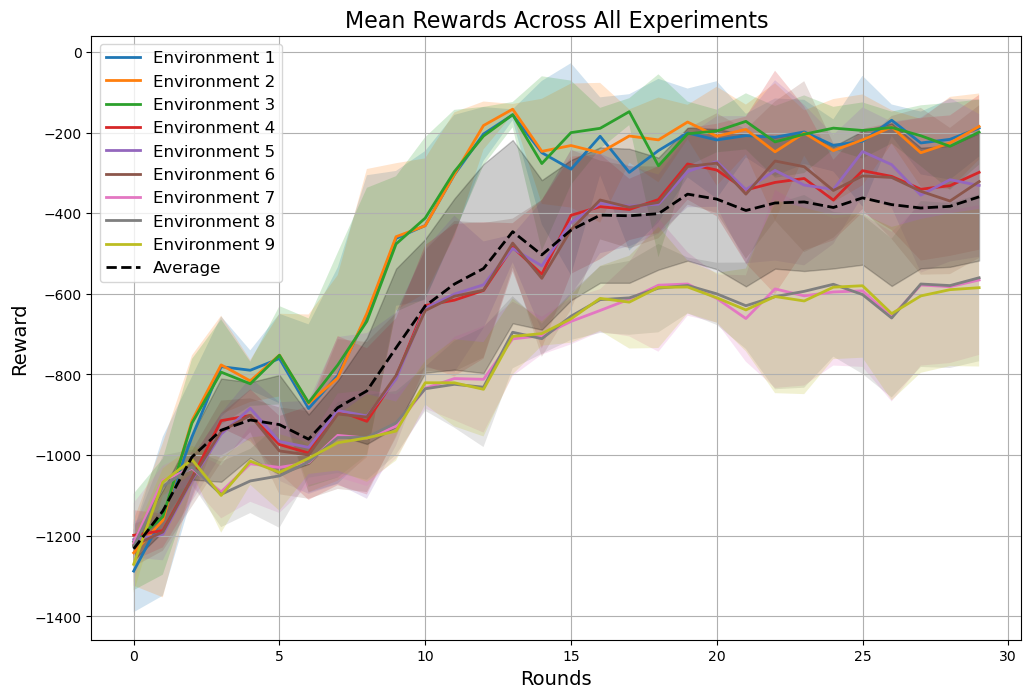

In [10]:
# 绘制所有实验的结果，设置plot_individual_envs=True以单独绘制每个环境的图
plot_all_experiments(rewards, plot_individual_envs=True)

In [10]:
env_avg_rewards = []
for expId in range(len(rewards)):
    print(expId)
    env_avg_rewards.append(np.mean(rewards[expId], axis=1))

0
1
2
3
4


In [11]:
env_avg_rewards

[array([-1168.0458851 , -1210.6746602 , -1175.04146836, -1148.97645443,
        -1072.61448445,  -929.08245367,  -851.9786907 ,  -541.29280318,
         -254.64737841,  -345.51086438,  -299.56893011,  -183.80297174,
         -191.94406183,  -244.86786491,  -312.20190459,  -296.21479812,
         -339.46257384,  -382.14696225,  -329.19263641,  -238.59213592,
         -337.6741605 ,  -313.1365385 ,  -384.5131839 ,  -320.94164273,
         -303.67746704,  -350.21681943,  -310.15410739,  -278.48937602,
         -189.93219041,  -194.92848636]),
 array([-1149.23451985, -1155.86575517, -1123.50817961, -1091.96493563,
        -1107.20398407, -1082.05807077, -1019.66423739,  -970.55568127,
         -645.62813494,  -645.60327645,  -252.31702181,  -209.85848123,
         -254.84992194,  -238.10110678,  -221.61443181,  -272.83661941,
         -269.98832349,  -340.65507034,  -324.45202986,  -324.27800401,
         -379.82079178,  -245.14951736,  -290.24808059,  -294.99506445,
         -402.90776489

In [12]:
save_dir = "Res_H_Env_Pen"
file_name = f"EnvAvg_FMRL_Baseline_EnsNumEachClient=3.npy"
np.save(os.path.join(save_dir, file_name), env_avg_rewards)

In [14]:
env_avg_rewards = np.load("Res_H_Env_Pen/EnvAvg_FMRL_Baseline_EnsNumEachClient=3.npy")

In [16]:
env_avg_rewards.shape

(5, 30)

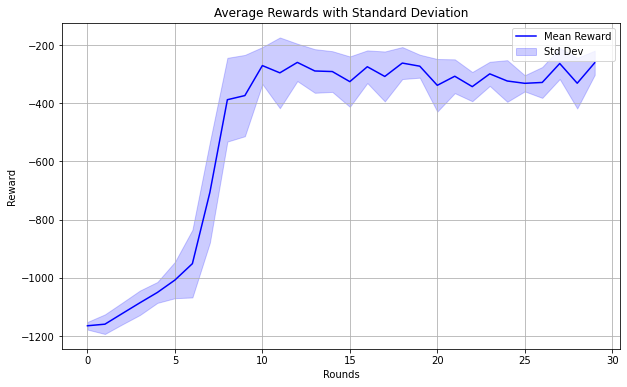

In [17]:
# 计算均值和方差
mean_rewards = np.mean(env_avg_rewards, axis=0)
std_rewards = np.std(env_avg_rewards, axis=0)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(mean_rewards, label='Mean Reward', color='b')

# 添加方差阴影
plt.fill_between(range(len(mean_rewards)), 
                 mean_rewards - std_rewards, 
                 mean_rewards + std_rewards, 
                 color='b', alpha=0.2, label='Std Dev')

# 添加图例和标签
plt.xlabel('Rounds')
plt.ylabel('Reward')
plt.title('Average Rewards with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()